In [1]:
%load_ext autoreload
%autoreload

import gc, os
from datetime import datetime
import warnings
import numpy as np, pandas as pd, scipy as sci
import seaborn as sns, matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, KFold


import lightgbm as lgb
import catboost as ca

print(ca)
#from tqdm import tqdm_notebook
warnings.filterwarnings('ignore')


<module 'catboost' from 'D:\\_devs\\Python01\\ana3\\envs\\py36intel\\lib\\site-packages\\catboost\\__init__.py'>


In [56]:


import json

json.load(open("stopwords.json", mode="r") )


JSONDecodeError: Expecting value: line 1 column 9 (char 8)

In [33]:
from util_feature import *
from util_date import *
from util_model import *
from util_text import *
print("ok")

ok


In [15]:
df = pd.read_csv('data/airbnb/reviews_summary.zip')
df.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."


In [16]:
df.describe()

,listing_id,id,reviewer_id
count,15695.00000,1.569500e+04,1.569500e+04
mean,124250.46467,9.049566e+07,3.037696e+07
std,69235.23891,9.936758e+07,4.103216e+07
min,2015.00000,4.283000e+03,1.580000e+03
25%,57209.00000,1.087664e+07,4.308715e+06
50%,139769.00000,4.693522e+07,1.377920e+07
75%,189288.00000,1.486514e+08,3.663417e+07
max,221015.00000,3.458654e+08,2.191963e+08


In [25]:
df.dtypes, df.shape

(listing_id        int64
 id                int64
 date             object
 reviewer_id       int64
 reviewer_name    object
 comments         object
 dtype: object, (15695, 6))

In [19]:
coltext = "comments"

Feature Processing

In [24]:
df[coltext]  = df[coltext].apply(  lambda x :  coltext_stemporter(str(x)) )

In [27]:
df[coltext]  = df[coltext].apply(  lambda x : coltext_lemmatizer(str(x)) )

In [28]:
df[coltext]  = df[coltext].apply(  lambda x : coltext_stopwords(str(x)) )

In [29]:
df[coltext].head(3)

0    mein freund und ich hatten gute gemütlich vier...
1    jan wa veri friend welcom host! apart wa great...
2    un appart tre bien situé dan un quartier histo...
Name: comments, dtype: object

In [39]:
 pd_coltext_wordfreq_df(df, coltext, 100)

,text,freq
0,clean,205
1,restaurants,175
2,bars,120
3,spacious,91
4,comfortable,87
5,quiet,77
6,great location,76
7,cafes,72
8,shops,66
9,bright,54


In [55]:
df_td = pd_coltext_tfidf(df, coltext, word_tokeep=None, word_minfreq=1)
df_td.head(5)

29768
(15695, 29768)


,00,00am,00h,00u,01,02,03,04,09,0h00,...,환영해주었다고,후기,후져,훌륭합니다,훨씬,흡사하여,힘들,ﾄﾗﾑや駅から数分で,ﾌﾗﾝｸはとても優しくて,ﾎｽﾄの方はとても親切
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:

df_td = pd_coltext_tfidf(df, coltext, word_tokeep=None, word_minfreq=1)


29768
(15695, 29768)


In [51]:

pd_coltext_wordfreq(df, coltext) 

{'00': 33,
 '00am': 1,
 '00h': 1,
 '00u': 1,
 '01': 2,
 '02': 3,
 '03': 2,
 '04': 1,
 '09': 2,
 '0h00': 1,
 '0pm': 1,
 '10': 505,
 '100': 133,
 '1000': 9,
 '1001': 1,
 '100euro': 1,
 '100m': 12,
 '100th': 2,
 '103': 1,
 '105': 1,
 '109': 6,
 '10am': 4,
 '10e': 1,
 '10euro': 1,
 '10h': 1,
 '10h40': 1,
 '10ish': 1,
 '10km': 2,
 '10m': 2,
 '10min': 24,
 '10minut': 2,
 '10mn': 1,
 '10mon': 1,
 '10p': 1,
 '10pm': 10,
 '10th': 6,
 '10uhr': 1,
 '10x': 1,
 '10분만': 1,
 '10분이내에': 1,
 '11': 37,
 '110': 3,
 '1130': 1,
 '11am': 2,
 '11h': 3,
 '11pm': 6,
 '11시까지': 1,
 '12': 49,
 '120': 2,
 '121': 1,
 '124': 1,
 '127': 1,
 '128': 1,
 '12h': 2,
 '12jahre': 1,
 '12pm': 2,
 '12y': 1,
 '13': 22,
 '130': 1,
 '14': 21,
 '140cm': 1,
 '142': 3,
 '145': 2,
 '147': 1,
 '14h': 2,
 '14h00': 1,
 '14j': 1,
 '15': 216,
 '150': 4,
 '150euro': 2,
 '151': 1,
 '152': 1,
 '15min': 11,
 '15mins': 2,
 '15mn': 1,
 '16': 11,
 '1600': 1,
 '166': 1,
 '169': 1,
 '16h': 1,
 '16month': 1,
 '17': 5,
 '173': 1,
 '176': 1,
 '176cm'

In [52]:
df_hash = pd_coltext_hashing(df, coltext, n_features=20)


(15695, 20)


In [54]:
df_hash.head(5) 

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19
0,-0.548821,0.000000,0.000000,0.109764,0.000000,-0.109764,0.000000,0.219529,0.219529,-0.439057,0.109764,0.000000,-0.329293,-0.219529,0.329293,0.109764,0.219529,0.000000,0.219529,0.000000
1,0.436436,0.000000,0.218218,0.000000,0.000000,0.218218,-0.218218,0.436436,0.000000,-0.218218,0.000000,-0.436436,0.000000,-0.218218,0.218218,0.000000,-0.218218,0.000000,0.218218,0.218218
2,-0.267261,-0.267261,-0.133631,0.000000,-0.133631,-0.400892,0.000000,-0.133631,-0.400892,-0.267261,0.133631,-0.133631,-0.267261,-0.133631,0.000000,-0.133631,-0.133631,-0.267261,0.400892,0.133631
3,0.000000,0.000000,0.000000,0.377964,-0.377964,0.377964,0.000000,-0.377964,-0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,0.377964
4,0.000000,0.118678,-0.118678,0.118678,0.474713,-0.237356,0.118678,-0.237356,0.000000,0.000000,0.118678,-0.237356,-0.356034,0.118678,0.356034,-0.356034,-0.356034,0.000000,0.118678,0.000000


In [31]:

train_df.loc[train_df['is_match']==-1, 'is_match'] = 0
test_df = pd.read_csv('./data/address_matching_test.csv')
test_df['is_match'] = np.nan


In [33]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
#     categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    categorical_columns = [col for col in df.columns]
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns


In [34]:
### NA handling
df_ = train_df.append(test_df)
use_columns = [s for s in df_.columns if s not in ['id', 'is_match']]
df = df_[use_columns]

for c in df.columns:
    if df[c].dtype=='object':
        df.loc[df[c]=='?', c]=0
    else:
        print('skip ', c)


skip  name_levenshtein_simple
skip  name_trigram_simple
skip  name_levenshtein_term
skip  name_trigram_term


In [35]:
### Encode numerical into Category to handle NA distribution

labels = [1,2,3,4,5]
categories = ['phone_equality', 'fax_equality', 'street_number_equality']
for c in df.columns:
    if c in categories: continue
    df[c] = df[c].astype(np.float32)
    mi,ma = df[c].min(), df[c].max()
    space=(ma-mi)/5
    bins = [mi+i*space for  i in range(6)]
    bins[0]-=0.0000001
    df[c] = pd.cut(df[c], bins=bins, labels=labels)

    
    


In [37]:
df.head(5)
    




,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,zip_trigram_simple,...,website_trigram_term,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram,phone_equality,fax_equality,street_number_equality
0,4,4,3,3,1,1,1,1,1,1,...,1,1,1,1,1,5,5,m,m,s
1,4,4,3,3,1,1,1,1,1,1,...,1,1,1,1,1,5,5,m,m,s
2,5,5,5,5,5,5,5,5,5,5,...,1,5,5,1,1,5,5,s,m,s
3,3,2,2,1,1,1,1,1,1,1,...,1,5,5,1,1,1,1,s,m,n
4,4,4,3,3,5,5,5,5,5,5,...,1,5,5,1,1,5,5,s,m,s


In [38]:
# categories = ['phone_equality', 'fax_equality', 'street_number_equality']
# for c in df.columns:
#     if c in categories: continue
#     df[c] = df[c].astype(np.float32)
    
df, cols = one_hot_encoder(df, nan_as_category=False)



In [39]:
### Merge back
df['is_match'] = df_['is_match']



In [35]:
def pd_coltext_wordfreq(df, coltext) :
  """
  :param df:
  :param coltext:
  :return:
  """
  from sklearn.feature_extraction.text import CountVectorizer
  cv = CountVectorizer()
  cv_fit=cv.fit_transform( df[coltext] )
  word_list = cv.get_feature_names()
  count_list = list( np.asarray(cv_fit.sum(axis=0)))
  word_dict =  dict(zip(word_list,count_list))
  return word_dict



In [40]:
#### Train
train_df = df[df['is_match'].notnull()]

#### Null is Test
test_df = df[df['is_match'].isnull()]

FEATS_EXCLUDED = ['is_match']
feats = [f for f in train_df.columns if f not in FEATS_EXCLUDED]



In [41]:
#### Train Split
X = train_df[feats].values
yy = train_df['is_match'].values

### High test % to reduce overfitting
X_train, X_test, y_train, y_test = train_test_split( X, yy, test_size=0.8, 
                                                     random_state=42)




Test confusion matrix
[[ 5890   499]
 [ 1171 15028]]
[[0.92189701 0.07810299]
 [0.07228841 0.92771159]]
auc 0.9792350889838005
gini 0.958470177967601
acc 0.9260669381972729
f1macro 0.9115991082566408
Nsample 22588
             precision    recall  f1-score   support

          0       0.83      0.92      0.88      6389
          1       0.97      0.93      0.95     16199

avg / total       0.93      0.93      0.93     22588



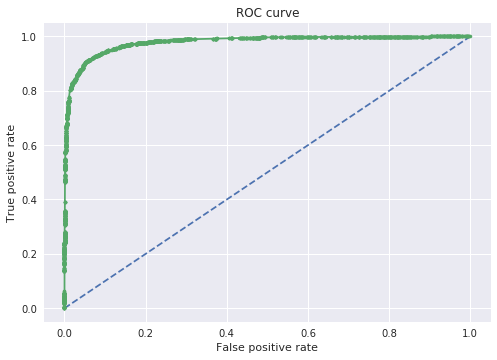

In [42]:
### L1 penalty to reduce overfitting
clf = sk.linear_model.LogisticRegression(penalty = 'l1' , class_weight = 'balanced')

clf.fit(X_train, y_train)
ytest_proba   = clf.predict_proba(X_test)[:, 1]
ytest_pred    = clf.predict(X_test)
sk_showmetrics(y_test, ytest_pred, ytest_proba)




In [ ]:
"""
Sparse Logistics


"""

In [45]:
df_featlogis = feature_impt_logis(clf, feats)
df_featlogis


,coef,coef_abs,feature,rank
21,-3.370079,3.370079,city_levenshtein_simple_2,0
15,-2.696743,2.696743,name_trigram_term_1,1
138,2.417505,2.417505,street_number_equality_s,2
5,-2.196318,2.196318,name_trigram_simple_1,3
9,2.045291,2.045291,name_trigram_simple_5,4
104,1.964715,1.964715,phone_levenshtein_5,5
56,-1.773089,1.773089,zip_trigram_term_2,6
92,-1.449794,1.449794,website_levenshtein_term_3,7
131,-1.439839,1.439839,phone_equality_n,8
84,1.343591,1.343591,website_levenshtein_simple_5,9


In [46]:
### NO Null Features
len(df_featlogis[df_featlogis["coef_abs"] > 0.0 ])

69

In [ ]:

preds = clf.predict(test_df[feats])
preds[preds==0] = -1


In [ ]:
test_df = pd.read_csv('./data/address_matching_test.csv')
test_df['is_match'] = preds.astype(int)
test_df = test_df.reset_index()
test_df[['id', 'is_match']].to_csv('result.csv', index=False)


